In [502]:
import pandas as pd
import numpy as np
import scipy as scp
import geopy # pip install geopy if necessary

## Make a dico to have unique countries ==> find country name in englsih

In [503]:
dico = pd.read_csv('data/Destination-Coordinate.csv',delimiter=',',low_memory=False)

In [504]:
dico.head()

,Unnamed: 0,destination,Coord,Point,Coord_x,Coord_y
0,France,France,"France métropolitaine, France","(46.603354, 1.8883335, 0.0)",46.603354,1.888333
1,Spain,Spain,España,"(39.3262345, -4.8380649, 0.0)",39.326234,-4.838065
2,Germany,Germany,"Deutschland, Europe","(51.0834196, 10.4234469, 0.0)",51.083420,10.423447
3,Switzerland,Switzerland,Schweiz/Suisse/Svizzera/Svizra,"(46.7985624, 8.2319736, 0.0)",46.798562,8.231974
4,United Kingdom,United Kingdom,UK,"(54.7023545, -3.2765753, 0.0)",54.702355,-3.276575


In [505]:
dico.shape

(238, 6)

In [506]:
dico.index = dico['Unnamed: 0']
dico = dico.drop(columns=['Unnamed: 0'])

In [507]:
dico['joined'] = dico['Coord_x'].astype(str) + ', ' + dico['Coord_y'].astype(str)
dico.head()

,destination,Coord,Point,Coord_x,Coord_y,joined
Unnamed: 0,,,,,,
France,France,"France métropolitaine, France","(46.603354, 1.8883335, 0.0)",46.603354,1.888333,"46.603353999999996, 1.8883334999999999"
Spain,Spain,España,"(39.3262345, -4.8380649, 0.0)",39.326234,-4.838065,"39.3262345, -4.838064900000001"
Germany,Germany,"Deutschland, Europe","(51.0834196, 10.4234469, 0.0)",51.083420,10.423447,"51.0834196, 10.4234469"
Switzerland,Switzerland,Schweiz/Suisse/Svizzera/Svizra,"(46.7985624, 8.2319736, 0.0)",46.798562,8.231974,"46.7985624, 8.231973599999998"
United Kingdom,United Kingdom,UK,"(54.7023545, -3.2765753, 0.0)",54.702355,-3.276575,"54.702354500000006, -3.2765752999999997"


In [508]:
# test
location = geolocator.reverse('46.603354, 1.8883335', language='en')
adress = location.address
adress = adress.split(",")
adress[-1]

' France'

In [509]:
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=5)

In [510]:
dico_reversed = dico['destination']
dico_reversed = pd.DataFrame(dico_reversed)
dico_reversed.head()

,destination
Unnamed: 0,
France,France
Spain,Spain
Germany,Germany
Switzerland,Switzerland
United Kingdom,United Kingdom


In [511]:
def findCountry(x):
    location = geolocator.reverse(x, language='en')
    tmp = location.address
    if(tmp):
        tmp = tmp.split(",")
        #print(tmp[-1])
        return tmp[-1]
    else:
        return 'NaN'

In [512]:
dico_reversed['country']= dico['joined'].apply(lambda x: findCountry(x))

In [513]:
#dico_reversed.to_csv('data/AllNamesOneCountry.csv')

In [514]:
#dico_reversed_save = dico_reversed
dico_reversed = pd.read_csv('data/AllNamesOneCountry.csv',delimiter=',',low_memory=False)

In [515]:
dico_reversed.head()

,Unnamed: 0,destination,country
0,France,France,France
1,Spain,Spain,Spain
2,Germany,Germany,Europe
3,Switzerland,Switzerland,Switzerland
4,United Kingdom,United Kingdom,United Kingdom


In [516]:
dico_reversed[dico_reversed['destination'].values == 'Antilles']

,Unnamed: 0,destination,country
200,Antilles,Antilles,USA


In [517]:
dico_reversed[dico_reversed['country'].values == ' Europe']

,Unnamed: 0,destination,country
2,Germany,Germany,Europe
35,Deutschland,Deutschland,Europe
43,Allemagne,Allemagne,Europe
93,Alemania,Alemania,Europe
107,Europe,Europe,Europe
192,Alemanha,Alemanha,Europe
219,Duitsland,Duitsland,Europe
221,Tyskland,Tyskland,Europe


In [518]:
def removeSpace(l):
    if not isinstance(l, str): #type(l) != <class 'str'>: # handle nan
        return 'nan'

    if l[0] == ' ':
        return l[1:]
    else:
        return l

In [519]:
dico_reversed['country'] = dico_reversed['country'].apply(lambda l: removeSpace(l))
dico_reversed.head()

,Unnamed: 0,destination,country
0,France,France,France
1,Spain,Spain,Spain
2,Germany,Germany,Europe
3,Switzerland,Switzerland,Switzerland
4,United Kingdom,United Kingdom,United Kingdom


In [520]:
# Some manual changes

In [521]:
def checkCountry(destination, country):
    #print(row)
    #print(destination)
    #print(country)
    l = destination
    
    if l == 'Republic of the Congo' or l == 'Democratic Republic of the Congo':
        return 'Congo'
    
    elif l == 'Dominican Republic':
        return 'Dominica'
    elif l == 'Swaziland':
        return 'Swaziland'
    elif l == 'Suiss':
        return 'Switzerland'
    elif l == 'Hong Kong':
        return 'Hong Kong'
    elif l == 'Macau':
        return 'Macau'
    elif l == 'Dom-tom':
        return 'France'
    elif l == 'Mauritania':
        return 'Mauritania'
    elif l == 'European Union':
        return 'Europe'
    elif l == 'Central African Republic':
        return 'CAR'
    elif l == 'Virgin Islands of the United States':
        return 'USA'
    
    elif l == 'French Polynesia' or l == 'Polynesie-francaise':
        return 'France'
    
    elif l == 'Germany' or l == 'Deutschland' or l == 'Allemagne' or l == 'Alemania' or l == 'Alemanha' or l == 'Duitsland' or l == 'Tyskland':
        return 'Germany'
    
    else:
        return country
    

In [522]:
#dico_reversed['country'] = dico_reversed['destination'].apply(lambda l: checkCountry(l))
#dico_reversed['country'] = dico_reversed.apply(lambda row: print(type(row['country'])), axis=1)
dico_reversed['country'] = dico_reversed.apply(lambda row: checkCountry(row['destination'], row['country']), axis=1)

In [523]:
#dico_reversed

In [524]:
#dico_reversed[dico_reversed['destination'].values == 'Republic of the Congo']#['country'] = 'Congo'
#err['country'] = 'Congo'
#err

In [525]:
dico_reversed.to_csv('data/Destination-Coordinate-MAN.csv')

In [34]:
type(dico_reversed)

pandas.core.frame.DataFrame

In [35]:
dico_reversed['country'][dico_reversed.index == 'Germany']

KeyError: False

In [36]:
dico_reversed['country'][dico_reversed.index == 'French Polynesia']

KeyError: False

## Apply to the products

In [554]:
z1_safe = z1
z1.head()

destination          Arrival
0 106          France           France
  251          France           France
  254          Canada           Canada
  264          Canada           Canada
  269  United Kingdom   United Kingdom

In [555]:
z1.shape

(96837, 2)

In [556]:
dictionary = dict(zip(dico_reversed.index, dico_reversed['country']))

In [557]:
#print(dictionary)

In [558]:
dictionary['France']

' France'

In [559]:
z1['Arrival'] = z1['destination'].apply(lambda l: dictionary[l])

In [561]:
print(z1['Arrival'].shape)
z1 = z1[z1['Arrival'] != 'NaN']
print(z1['Arrival'].shape)

(96837,)
(96700,)


In [564]:
count = z1['Arrival'].value_counts()

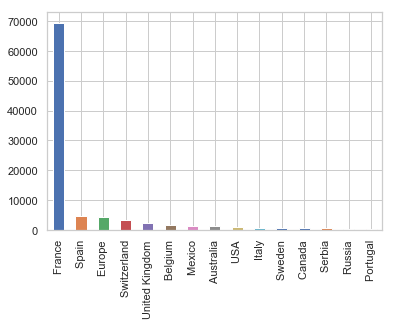

In [565]:
count[0:15].plot.bar()

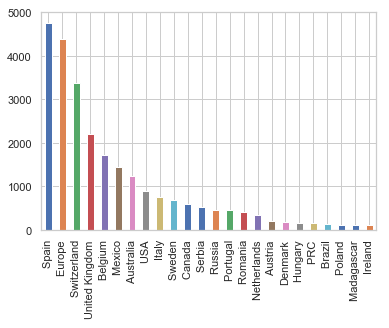

In [566]:
count[1:25].plot.bar()